<a href="https://colab.research.google.com/github/AlexanderKuznetsov03/DataScince/blob/main/Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


In [ ]:
p_df=pd.read_csv('/content/fish_catch.csv')
p_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Sex
0,Lahna,242.0,23.2,25.4,30.0,38.4,13.4,NaN
1,Lahna,290.0,24.0,26.3,31.2,40.0,13.8,NaN
2,Lahna,340.0,23.9,26.5,31.1,39.8,15.1,NaN
3,Lahna,363.0,26.3,29.0,33.5,38.0,13.3,NaN
4,Lahna,430.0,26.5,29.0,34.0,36.6,15.1,NaN


In [ ]:
p_df = p_df.dropna()
print(p_df.shape)

(71, 8)


In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
p_df['Sex'] = imputer.fit_transform(p_df[['Sex']])
p_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Sex
14,Lahna,600.0,29.4,32.0,37.2,40.2,13.9,1.0
16,Lahna,700.0,30.4,33.0,38.3,38.8,13.8,1.0
20,Lahna,575.0,31.3,34.0,39.5,38.3,14.1,1.0
25,Lahna,725.0,31.8,35.0,40.9,40.0,14.8,1.0
29,Lahna,1000.0,33.5,37.0,42.6,44.5,15.5,0.0


In [ ]:
label_encoder = LabelEncoder()
p_df['Species'] = label_encoder.fit_transform(p_df['Species'])
p_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Sex
14,2,600.0,29.4,32.0,37.2,40.2,13.9,1.0
16,2,700.0,30.4,33.0,38.3,38.8,13.8,1.0
20,2,575.0,31.3,34.0,39.5,38.3,14.1,1.0
25,2,725.0,31.8,35.0,40.9,40.0,14.8,1.0
29,2,1000.0,33.5,37.0,42.6,44.5,15.5,0.0


In [ ]:
duplicateRows = p_df[p_df.duplicated ()]

In [ ]:
duplicateRows

,Species,Weight,Length1,Length2,Length3,Height,Width,Sex


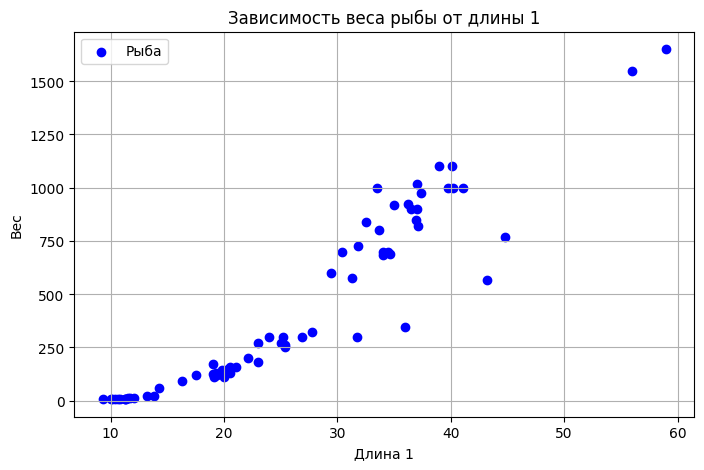

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(p_df['Length1'], p_df['Weight'], c='b', label='Рыба')
plt.xlabel('Длина 1')
plt.ylabel('Вес')
plt.title('Зависимость веса рыбы от длины 1')
plt.legend()
plt.grid(True)
plt.show()

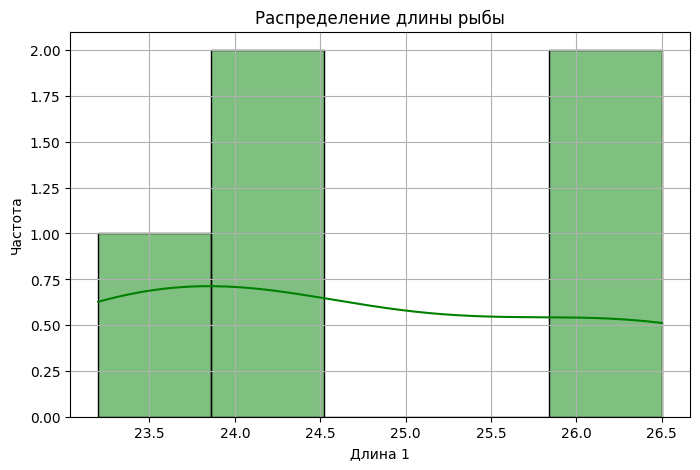

In [ ]:
lengths = [23.2, 24.0, 23.9, 26.3, 26.5]

plt.figure(figsize=(8, 5))
sns.histplot(lengths, bins=5, kde=True, color='g')
plt.xlabel('Длина 1')
plt.ylabel('Частота')
plt.title('Распределение длины рыбы')
plt.grid(True)
plt.show()

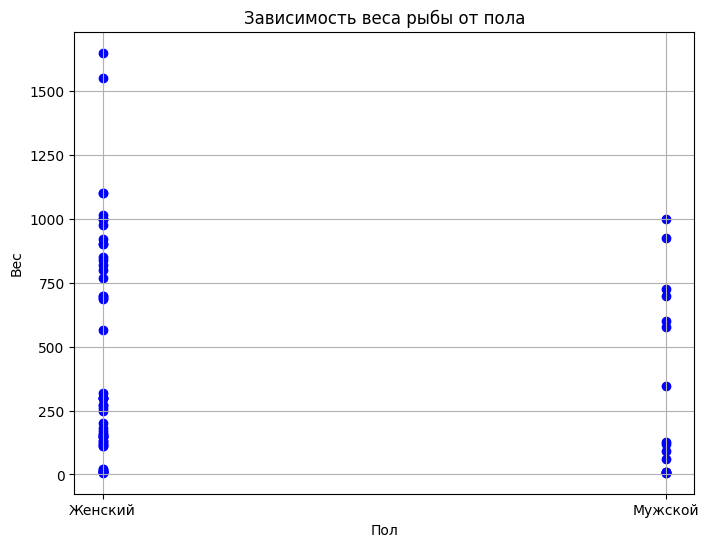

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(p_df['Sex'], p_df['Weight'], marker='o', color='b')
plt.xticks([0, 1], ['Женский', 'Мужской'])
plt.xlabel('Пол')
plt.ylabel('Вес')
plt.title('Зависимость веса рыбы от пола')
plt.grid(True)
plt.show()

In [ ]:
p_df=p_df.drop("Sex", axis=1)
X = p_df.drop("Weight", axis=1)
Y = p_df[["Weight"]]
Y.head()

,Weight
14,600.0
16,700.0
20,575.0
25,725.0
29,1000.0


In [ ]:
X.head()

,Species,Length1,Length2,Length3,Height,Width
14,2,29.4,32.0,37.2,40.2,13.9
16,2,30.4,33.0,38.3,38.8,13.8
20,2,31.3,34.0,39.5,38.3,14.1
25,2,31.8,35.0,40.9,40.0,14.8
29,2,33.5,37.0,42.6,44.5,15.5


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

x_train.shape

(56, 6)

In [ ]:
model = LinearRegression()

# Обучение модели на обучающей выборке
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R^2): {r2:.2f}')

Mean Squared Error (MSE): 16954.06
R-squared (R^2): 0.85


In [47]:
import statsmodels.api as sm

X_train = sm.add_constant(x_train)
model_4 = sm.OLS(y_train, X_train).fit()
print(model_4.summary())


                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     67.34
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           5.87e-22
Time:                        17:50:09   Log-Likelihood:                -356.42
No. Observations:                  56   AIC:                             726.8
Df Residuals:                      49   BIC:                             741.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -549.3536    132.008     -4.162      0.0